**Samuel Munoz**

Spring 2021

CS 252: Mathematical Data Analysis and Visualization

Project 5: Clustering

In [46]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

import kmeans

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 1: K-means clustering

In this task, you will implement the K-means clustering algorithm and test your code on simple test data.

### 1a) Import `super_simple` data

- In the cell below, use pandas to load in `super_simple.csv` (30 x,y values), convert the Dataframe to a ndarray.
- Create a scatter plot below to see what the data look like.

In [47]:
import pandas as pd

# read csv file
simple_df = pd.read_csv("data/super_simple.csv", delimiter=",")

# convert to ndarray
super_simple = simple_df.to_numpy()

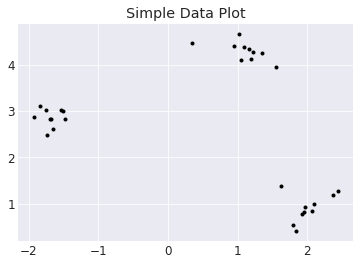

In [48]:
# set global font
plt.rcParams["font.size"] = 12

# plot data
plt.plot(super_simple[:, 0], super_simple[:, 1], "k.")
plt.title("Simple Data Plot")
plt.show()

### 1b) Implement and test core K-means methods

In this task, you will implement the methods needed to cluster a dataset using K-means. The goal of this subtask is to create a scatterplot with each data sample color-coded based on the cluster it belongs to. You will be testing on the `super_simple` data.

In `kmeans.py` implement the following methods, using the following test code to help you out along the way:
- `set_data`: Update the data stored by the k-means clustering object.
- `get_data`: Return a copy of the data.
- `dist_pt_to_pt`: Compute the Euclidean distance from one data sample to one other. See below for formula.
- `dist_pt_to_centroids`: Compute the distance from one data sample to all the cluster centroids.
- `initialize`: Initalize K-means by setting the initial centroids
- `update_labels`: Assign each data sample to the nearest centroid
- `update_centroids`: Calculate each cluster's centroid, given the data samples that are assigned to it.
- `inertia`: Calculate the mean squared distance between each data sample and its (nearest) centroid. This is a 'quality of clustering' performance metric for analysis
- `cluster`: Run K-means to cluster the data. This is the actual method you call to do the clustering (above methods are helper methods).
- `plot_clusters`: Creates a scatterplot of the data (2D only) with data assigned to each cluster sharing the same color.

**Formula for Euclidean distance:**
$$dist \left (\vec{p_0}, \vec{p_1} \right ) = \sqrt{\left (d_{0} - e_{0} \right )^2 + \left (d_{1} - e_{1} \right )^2  + \ldots}$$ for data samples $\vec{p_0} = \left (d_{0}, d_{1}, \ldots \right )$ and $\vec{p_1} = \left (e_{0}, e_{1}, \ldots \right )$

#### Test constructor

In [49]:
cluster = kmeans.KMeans(super_simple)
print(f'Data isnt none? {np.all(cluster.data != None)}')
print(f'Data num samples isnt none? {np.all(cluster.num_samps != None)}')
print(f'Data num samples is {cluster.num_samps} and should be 30.')
print(f'Data num features isnt none? {np.all(cluster.num_features != None)}')
print(f'Data num features is {cluster.num_features} and should be 2.')

Data isnt none? True
Data num samples isnt none? True
Data num samples is 30 and should be 30.
Data num features isnt none? True
Data num features is 2 and should be 2.


#### Test `get_data`

In [50]:
super_simple_cpy = cluster.get_data()
super_simple_cpy[0,:] = -99
if np.all(cluster.data[0,:] == -99):
    print('You didnt return a copy of the data! Re-import the super_simple data and try again...')
else:
    print('All good!')

All good!


#### Test `dist_pt_to_pt`

In [51]:
a = np.array([1, 2, 3, 4])
b = 4*a
print(f'Your pt-to-pt distance is {cluster.dist_pt_to_pt(a, b)}')
print(f'Correct pt-to-pt distance is {np.linalg.norm(a-b)}')

Your pt-to-pt distance is 16.431676725154983
Correct pt-to-pt distance is 16.431676725154983


#### Test `dist_pt_to_centroids`

In [52]:
test_pt = np.array([[1, 2]])
test_centroids = np.array([[9, 9], [11, 11], [0, 0]])
print(f'Your pt-to-centroids distance is {cluster.dist_pt_to_centroids(test_pt.flatten(), test_centroids)}')
print(f'Correct pt-to-centroids distance is {distance.cdist(test_pt, test_centroids)[0]}')

Your pt-to-centroids distance is [10.63015 13.45362  2.23607]
Correct pt-to-centroids distance is [10.63015 13.45362  2.23607]


#### Test `initialize`

In [53]:
test_k = 3
init_centroids = cluster.initialize(test_k)
print(f'Initial cluster centroids shape is:\n{init_centroids.shape} and should be (3, 2)')

Initial cluster centroids shape is:
(3, 2) and should be (3, 2)


#### Test `update_labels`

In [54]:
# Consistently set initial centroids for test
init_centroids = np.array([[ 0.338, 4.4672], [-1.8401, 3.1123], [1.7931, 0.5427]])

new_labels = cluster.update_labels(init_centroids)
print(f'After the first update data label step, 1st 10 of your cluster assignments are:\n{new_labels[:10]}')
print('Your 1st 10 cluster assignments should be:\n[0 1 1 1 2 0 2 1 2 1]')

After the first update data label step, 1st 10 of your cluster assignments are:
[0 1 1 1 2 0 2 1 2 1]
Your 1st 10 cluster assignments should be:
[0 1 1 1 2 0 2 1 2 1]


#### Test `update_centroids`

In [55]:
new_centroids, diff_from_prev_centroids = cluster.update_centroids(test_k, new_labels, init_centroids)
print(f'After the first centroid update, your cluster assignments are:\n{new_centroids}')
print(f'Your difference from previous centroids:\n{diff_from_prev_centroids}')

After the first centroid update, your cluster assignments are:
[[ 1.09087  4.29295]
 [-1.68133  2.85917]
 [ 2.00717  0.9184 ]]
Your difference from previous centroids:
[[ 0.75287 -0.17425]
 [ 0.15877 -0.25313]
 [ 0.21407  0.3757 ]]


You should see:

    After the first centroid update, your cluster assignments are:
        [[ 1.09087  4.29295]
         [-1.68133  2.85917]
         [ 2.00717  0.9184 ]]
    Your difference from previous centroids:
        [[ 0.75287 -0.17425]
         [ 0.15877 -0.25313]
         [ 0.21407  0.3757 ]]

#### Test `inertia`

In [56]:
cluster.centroids = new_centroids
cluster.data_centroid_labels = new_labels
print(f'After the first test k-means update, your inertia is:\n{cluster.compute_inertia()}\nIt should be\n0.10738760429999998')

After the first test k-means update, your inertia is:
0.1073876043
It should be
0.10738760429999998


#### Test `plot_clusters` and `cluster`

In the cell below:

- Run K-means on the `super_simple` dataset, picking $k$ that makes sense.
- Run `plot_clusters` to generate a scatterplot. Make sure that the cluster assignment looks like the following image:

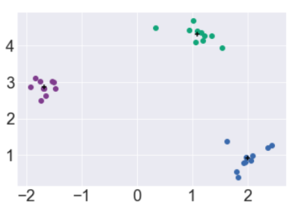

Cluster successfully initialized (method: random)
Loop 2
Updated cluster labels
Updated centroids
Loop 3
Updated cluster labels
Updated centroids
Loop 4
Updated cluster labels
Updated centroids


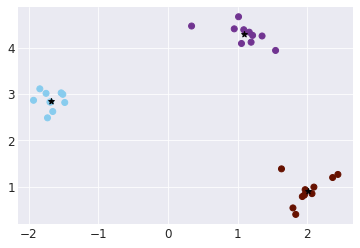

In [94]:
np.random.seed(0)
# run k-means
inertia = cluster.cluster(3, max_iter=100, verbose=True)

# plot data
cluster.plot_clusters()
plt.show()

### 1c) Determining the number of clusters $k$

In this task, you will explore how to determine the number of clusters in a dataset.

- Implement `elbow_plot` in `kmeans.py`.
- Create an elbow plot below for the `super_simple` dataset. It should look like the below image.

**NOTE:** Make sure to include a meaningful x label, y label, and x tick marks.

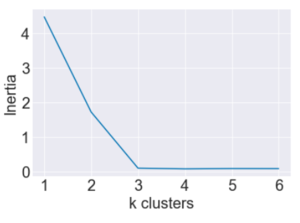

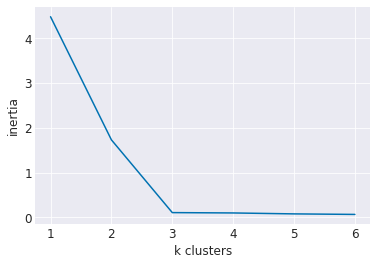

In [93]:
#  call elbow plot and show plot
cluster.elbow_plot(6)
plt.show()

# for some odd reason, my elbow plot does not look like the elbow plot above if you only run my elbow plot once.
# however, if you run this method several times, you will eventually get the plot above.

**Question:** How many clusters are there in the `super_simple` data, based on the elbow plot that you made? Briefly explain how you determined this.

**Answer:** It looks there are 3 three cluster in my data set. I can tell because after running k-means algorthim 3 times, the inertia of the set is almost 0. Additionally, the inertia at $k \ge 3$ does not decrease dramatically. Therefore, at $k=3$, the centroids are not far away from the points near it and increasing the number of cluster does not improve the inertia value.

#### Determine number of clusters in `five_blobs` dataset

- Load in the `five_blobs` dataset.
- Run K-means on it.
- Create a scatterplot to visualize the clustering.
- Create an elbow plot showing the inertia with different $k$ values

**NOTE:** Keep the random seed line below.

[]

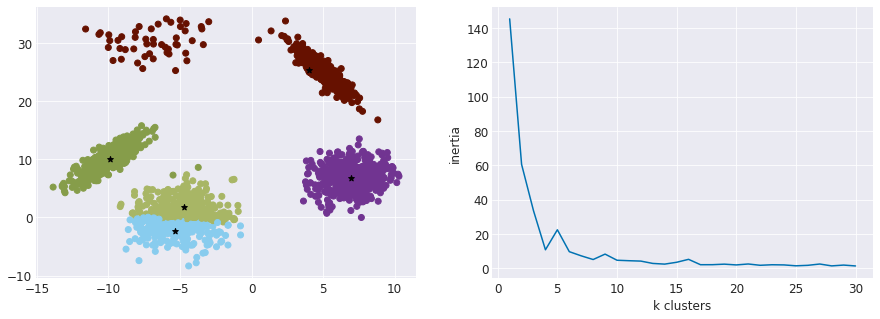

In [59]:
np.random.seed(3)

# load in five_blobs
five_blobs_df = pd.read_csv("data/five_blobs.csv", delimiter=",").to_numpy()
five_blobs = kmeans.KMeans(five_blobs_df)

# run K-means
five_blobs.cluster(k=5, max_iter=100)

# create subplots
plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# plot results
plt.subplot(121)
five_blobs.plot_clusters()

# plot elbow plot
plt.subplot(122)
five_blobs.elbow_plot(30)
plt.plot()

**Question:** What's wrong with clusters shown in the scatterplot? Why does it happen?

**Answer:** There is are two cluster in the scatterplot above that should be one. It occurs due to bad initial starting positions of the centroids.

**Question:** Based on the elbow plot, how many clusters are there? Is it easy or hard to determine? Does it make sense?

**Answer:** In the plot above, it appears that there would be 7 since there are more spikes after $k=7$ and at that point, there appears to be little change in inertia. This is very hard to tell because of the large number of k cluster on the plot. However, the plot does make sense.

#### Run K-means multiple times, save the best clustering

To address the problems faced above, we can run K-means multiple times and take the best results for our clustering.

- Implement `cluster_batch` to run K-means multiple times with a sensible $k$ value.
- Run `plot_clusters` again.

**NOTE:** Keep the random seed line below.

[]

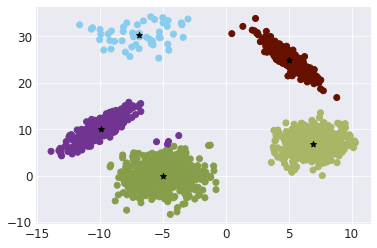

In [60]:
np.random.seed(3)

# batch cluster and plot results
five_blobs.cluster_batch(5, 20)
five_blobs.plot_clusters()
plt.plot()

**Question:** Did the clustering improve? Why?

**Answer:** Yes, the clustering improved. The cluster that was two clusters beforehand are now one cluster. Additionally, the rest of the cluster are appropriate given the structure of the data.

## Task 2: Improved initialization and cluster detection

Here, we will explore more sophisticated techniques for initializing K-means and determining the number of clusters in a dataset. 

### 2a) K-means++ initialization

- In `kmeans.py::initialize_plusplus` implement the K-means++ initialization algorithm.

Recall that the idea is to set the 1st centroid to be a random data sample. To determine each of the remaining centroids, compute the MINIMUM distance from each data sample to ONLY the centroids ALREADY DEFINED (i.e. what's the closest distance of each point to centroids that are currently defined). For example, if we're determining centroid 3, we would find the distance between each data sample and the closest centroid (1 or 2...whichever is closer). Then, we use these distances to create a probability distribution. The next centroid is determined by selecting a data sample in the dataset according to this probability distribition. The equation for the probability distribution is:$$p(x_i) = \frac{D(x_i)^2}{\sum_{j=1}^N D(x_j)^2}$$ where $D(x_i)$ is the distance between data sample $x_i$ and the nearest centroid already defined and $N$ is the number of data samples, like usual.

- Update `cluster` to take in an keyword argument `init_method='random'`. If the user selects 'random', run the old method. If the user selects 'kmeans++', run the K-means++ initialization.
- Create a scatterplot below with K-means++ initialization

Cluster successfully initialized (method: kmean++)
Loop 2
Updated cluster labels
Updated centroids
Loop 3
Updated cluster labels
Updated centroids


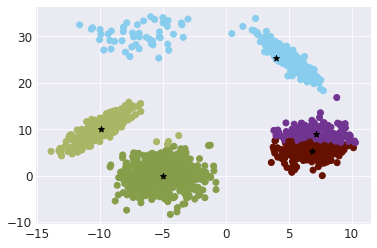

In [96]:
np.random.seed(3)
# run k-means++
five_blobs.cluster(k=5, max_iter=100, init_method="kmeans++", verbose=True)

# plot results
five_blobs.plot_clusters()
plt.show()

**Question:** Did the clustering get better? Why?

**Answer:** The cluster is somewhat better. I no longer get the large clustering the cluster at the center bottom of cluster. However, the cluster towards the bottom right corner are two different clusters that should just be one. It better since that cluster is smaller than the other cluster, but it is an improvement.

#### Compare number of iterations needed for K-means to converge

- Add support for the `init_method` optional parameter in `cluster_batch`.
- Add a return value to `cluster_batch`: the mean number of iterations required for each K-means instance to converge.
- Below, print out the mean number of iterations required for `random` and `kmeans++` initialization methods with the `five_blobs` dataset.

In [100]:
np.random.seed(3)

# run cluster batch for randomly initialized k-means
random = five_blobs.cluster_batch(5, 20, "random")

# run cluster batch for kmeans++ initialized k-means
kmeans_plus_plus = five_blobs.cluster_batch(5, 20, "kmeans++")

# print results
print(f"Avg. iterations for randomly initialized k-means: {random}")
print(f"Avg. iterations for randomly initialized k-means: {kmeans_plus_plus}")

Avg. iterations for randomly initialized k-means: 4.1
Avg. iterations for randomly initialized k-means: 3.5


**Question:** Which initialization method is better with respect to number of iterations required to converge?

**Answer:** The kmeans++ method is a better method than the random method. THe reason is that on average, it makes less iterations to converge in kmeans++ than randomly selected initial points. ($3.5 < 4.1$)

## Task 3: Image Segmentation and compression

In this task, you will apply K-means to one image and to compress it (*image compression*). The idea is that you will find $k$ RGB color centroids in the image, then replace each pixel in the image with the nearest centroid. This will compress an image, by only using $k$ colors to represent it. You can also think of this as doing a simple image region segmentation: regions with similar colors will belong to the same cluster. It also makes some cool retro effects!

### 3a) Load in baby bird image

- Use the imported `imread` method below to load in the `baby_bird.jpg` image.
- Use `plt.imshow` to display it in the notebook below. Turn off plot ticks!

In [63]:
from matplotlib.image import imread

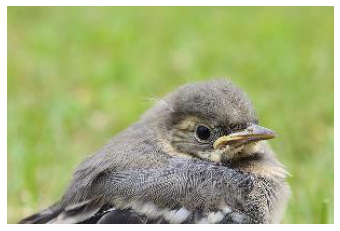

In [64]:
# store image
bird = imread("data/baby_bird.jpg")

# show image (removed ticks)
plt.imshow(bird)
plt.xticks([])
plt.yticks([])
plt.show()

### 3b) Preprocess image

- Fill in the function below to collapse (flatten) the 2D image into a big 1D vector of RGB values. For example, for the bird image, your function should take the shape `(num_rows, num_cols, rgb)` and convert it to `(num_rows*num_cols, rgb)`.
- Reshape the bird image from `(num_rows, num_cols, rgb)` and convert it to `(num_rows*num_cols, rgb)`. Final shape for baby bird image should be: `(61206, 3)`

In [65]:
def flatten(img):
    '''Flattens `img` to N 1D vectors.
    For example, for an RGB image, `(num_rows, num_cols, rgb)` -> `(num_rows*num_cols, rgb)`.
    
    Parameters:
    -----------
    img: ndarray. shape=(num_rows, num_cols, rgb)
    
    Returns:
    -----------
    Flattened `img`. ndarray. shape=(num_rows*num_cols, rgb)
    '''
    # reshape data
    return np.reshape(img, (img.shape[0] * img.shape[1], img.shape[2]) )

In [66]:
# flatten image data
bird_flat = flatten(bird)

# print shape
print(bird_flat.shape)

(61206, 3)


### 3c) Cluster RGB values in image

- Run K-means on the bird data vector.
- Implement `replace_color_with_centroid`: replace every pixel in the image with the nearest centroid RGB value.
- Compress the image by running `replace_color_with_centroid`.

In [67]:
# create kmeans data from data
bird_cluster = kmeans.KMeans(bird_flat.copy())

# run clusters on data set
bird_cluster.cluster(k=4, init_method="kmeans++")

# replace RGB tuple with nearest centroid
bird_cluster.replace_color_with_centroid()

### 3d) Postprocessing and visualization

- Rehape the compressed image data back to its original dimensions.
- Plot it below.

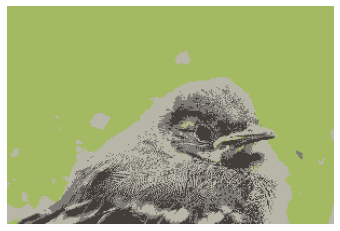

In [68]:
# reshape data back to original dimensions (make method)
def reshape(img, r, c):
    return np.reshape(img, (r, c, img.shape[1]))

# check if this works on original data
new_bird = reshape(bird_cluster.data, bird.shape[0], bird.shape[1])

# show image (removed ticks)
plt.imshow(new_bird)
plt.xticks([])
plt.yticks([])
plt.show()

### 3e) Run K-means and compress an image of your choice

Smaller images run a lot faster.

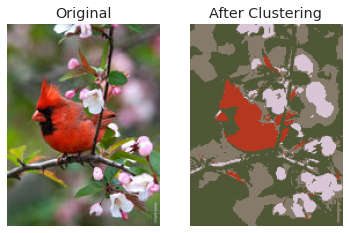

In [69]:
# store image
cardinal = imread("data/cardinal_bird.jpg")

# create subplots
plt.subplots(nrows=1, ncols=2)

# show image (removed ticks)
plt.subplot(121)
plt.imshow(cardinal)
plt.xticks([])
plt.yticks([])
plt.title("Original")

# flatten image data
cardinal_flat = flatten(cardinal)

# create kmeans data from data
cardinal_cluster = kmeans.KMeans(cardinal_flat.copy())

# run clusters on data set
cardinal_cluster.cluster(k=4, init_method="kmeans++")

# replace RGB tuple with nearest centroid
cardinal_cluster.replace_color_with_centroid()

# check if this works on original data
new_cardinal = reshape(cardinal_cluster.data, cardinal.shape[0], cardinal.shape[1])

# show image (removed ticks)
plt.subplot(122)
plt.imshow(new_cardinal)
plt.xticks([])
plt.yticks([])
plt.title("After Clustering")
plt.show()

**Extension: Silhouette Score**

For this extension, I decided to implement teh silhouette score. This a number-of-cluster detection metric. This metric measures how ideal the cluster are. Ideal in this case are cluster whose points are very close to each other and the distance between different cluster are very far away.

Silhouette score can be split into two parts. The general equation for it $S = \frac{b - a}{\text{max}(a, b)}$ where $a = \frac{1}{|C_i|-1}\sum_{j \in C_i}D(i, j)$ and $b = \text{min}\ \frac{1}{|C_k|}\sum_{j \in C_k}D(i, j)$ where $k \not = i$. In English, $a$ measure the average distance between each point in a cluster and $b$ measure how minimum average distance between itself and all points in cluster that the point does not long to. 

Looking at the equation $S = \frac{b - a}{\text{max}(a, b)}$, I can make a few conclusions. If the cluster are far away from each other, then $b$ is a large number. If the points in a cluster are far away from each other, then $a$ is a large number. Therefore, for data sample $x$, if the points in the cluster that include $x$ are not far from each other and the cluster that includes $x$ is far away from the other clusters, then $a$ is small value and $b$ is large value. Therefore, $\text{max}(a, b) = b$ and $S \approx 1$ because $b-a \approx b \rightarrow S \approx \frac{b}{b} = 1$.

Similarly, if for data sample $x$, if the points in the cluster that include $x$ are not far from each other and the cluster that includes $x$ is also not far away from the other cluster, then $a$ and $b$ are small values. Therefore, $S \approx 0$ because $b-a \approx 0$. This also applies to data sets such that the cluster that include $x$ are far from each other and the cluster that includes $x$ is also far away from the other clusters, then $a$ and $b$ are large values. That gives $S \approx 0$ for the reason above.

Lastly, for data sample $x$, if the points in the cluster that include $x$ are far from each other and the cluster that includes $x$ is not far away from the other clusters, then $a$ is large value and $b$ is small value. Therefore, $\text{max}(a, b) = a$ and $S \approx -1$ because $b-a \approx -a \rightarrow S \approx \frac{-a}{a} = -1$.

For my implementation of this metric, I implemented $a$ and $b$ into methods `average_distance` and `min_average_distance` respectively. Then, the method `silhouette_score` method computes the silhouette score for a given point. Finally, it is not helpful to only look at this metric for one point, but to look at it for many points. Therefore, I made the `average_silhouette` method to compute the silhouette score for all points in the data set and then computed its average to easily see how ideal the cluster are in the data on average. 

A downside to algorithm is that it is very computationally intensive once the data set include 10s and 100s of thousands of samples. I found this when I tried to run my silhouette score the data set for the bird images above. I never finished running this method on those data set, but I did wait several minutes for the algorithm to complete. Therefore below, I have shown the results of running my data set on the two data sets stored in the csv files. The results make sense because when $k=3$ and $k=5$ for the data sets below, they form cluster whose's points are near each other and the cluster are far away from each. Thus, from above, the points should be about 1, which is ideal. If you happen to run all cells at once, you'll get that $k=6$. The result is that you have clusters that very close to each other. As a result, this decreases the silhouette score to a value closer to 0. Rerun `cluster` with $k=3$ to see improvements.

In [101]:
# using super simple data set to test algorthim
print("Super simple average: ", cluster.average_silhouette_score())
print("Super simple k value: ", cluster.k)
print("Five blob average: ", five_blobs.average_silhouette_score())
print("Five blob average: ", five_blobs.k)

Super simple average:  0.8697657417964716
Super simple k value:  3
Five blob average:  0.7347375254805295
Five blob average:  5


Below, I have a set of plots that demonstrate the relationship between silhouette score and the number k-clusters selected. For any given $k$, there are three cases that $k$ can fall into. Either $k$ is too small of a value and there are too few clusters from ideal. $k$ could be too large of a value where there are more than cluster than needed for the ideal number of clusters. Lastly, $k$ just the right number such that you get the ideal number of cluster. If $k$ is too small, I would expect a smaller silhouette score because the points within a cluster would increase. If $k$ is too large, then I would expect a smaller silhouette because the minimum average distance between a cluster would decrease; thus, leading to a smaller silhouette score. At the right value of $k$, you get the largest value of $k$ which represents the point where the points in a cluster are as close as they can be and the different clusters are as far away from each other as possible.

What I found interesting was that the above true when $k$ is roughly half number of samples you have. I didn't consider the case when $k$ is greater than half number of samples. When this happens, the starts to appear cluster with only one data sample. These cluster have an $a$ value of 0. Therefore, they boost the silhouette score. Therefore, in the first plot where I compute k-means cluster for $k$ from 1 to 30 where $N = 30$, you see that once the number of cluster is roughly equal to the number of samples you have, the silhouette score dramatically increases until $k=30$ where every cluster has only one data point. This leads to $S = 1$. The point of this is to show the limitation of silhouette score. You can only use this metric if $k$ a small enough value. A $k$ value most likely less than half the number of samples points.

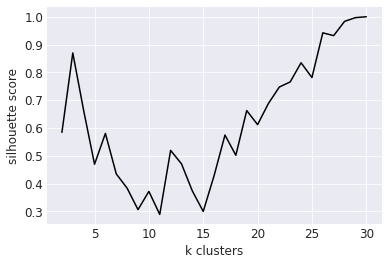

In [75]:
# plot silhouette score for increasing k values
cluster.plot_silhouette_score(30)
plt.show()

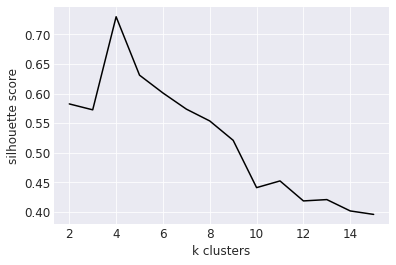

In [78]:
# plot silhouette score for increasing k values
five_blobs.plot_silhouette_score(15)
plt.show()

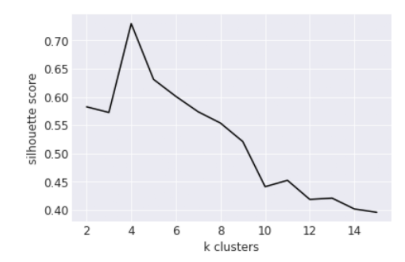

In [118]:
# the computation above takes a really long time to run (~5-10 minutes!) In the case that you invoke the command
# "run all [cells]", the cell will not produce a graph for a while. To ensure that you have a plot look at, below
# is a screen shot of the plot that would be produced by the command above

# read plot
plot = imread("data/Plot.png")

# display plot
plt.imshow(plot)
plt.xticks([])
plt.yticks([])
plt.rcParams["figure.figsize"] = (7, 7)
plt.show()

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

### 1) Image compression

- Run K-means on other images and quantify the reduction in space required to store each image (with different values of k).

### 2) Detect number of clusters in other datasets

- Cluster other datasets and create elbow plots to detect the number of clusters.

### 3) Cluster additional datasets

### 4) Other cluster detection metrics

- Research number-of-clusters detection metrics (e.g. siloutte score) and compare them to inertia on a dataset of your choice. Which does a better job at detecting number of clusters?

### 5) Animate the clustering process

- Make an animation showing K-means clustering unfolding across iterations until the algorithm converges. 

### 6) Leader algorithm

- Implement the leader algorithm and compare clustering results and runtime with K-means on datasets of your choice.